In [1]:
import matplotlib.pyplot as plt
from IPython.display import SVG
import pygraphviz as pgv
from IPython.display import Image, display, display_png

def draw_graph(G):
    fn='state.svg'
    G.draw(fn, prog='dot')
    display(SVG(fn)) 

In [2]:
style_attributes = {
    'node': {
        'default': {
            'shape': 'circle',
            'height': '1.2',
            'style': 'filled',
            'fillcolor': 'white',
            'color': 'black',
        },
        'initial': {
            'shape': 'circle',
            'width': '0.5',
            'width':'0.5',
            'style': 'filled',
            'fillcolor': 'black',
            'color': 'black',
        },
        'final': {
            'shape': 'doublecircle',
            'width': '0.5',
            'width':'0.5',
            'style': 'filled',
            'fillcolor': 'black',
            'color': 'black',
        },
        'active': {
            'color': 'red',
            'fillcolor': 'darksalmon',
            'shape': 'doublecircle'
        },
        'previous': {
            'color': 'blue',
            'fillcolor': 'azure2',
        }
    },
    'edge': {
        'default': {
            'color': 'black',

        },
        'previous': {
            'color': 'blue',

        }
    }
}


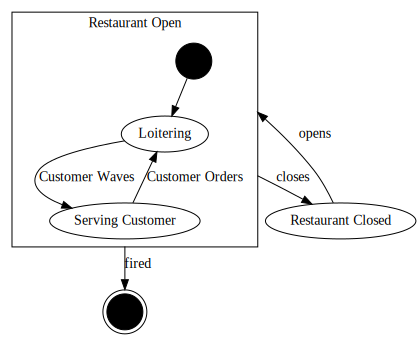

In [3]:
G = pgv.AGraph(directed=True)

G = pgv.AGraph(compound=True,directed=True)

sub = G.add_subgraph( name='cluster_1', label='Restaurant Open', rank='same')

sa = style_attributes['node']['initial']
sub.add_node( 'initial', label='', **sa)

sub.add_node('Loitering')
sub.add_node('Serving Customer')

sub.add_edge('initial','Loitering')
sub.add_edge('Loitering', 'Serving Customer', label='Customer Waves')
sub.add_edge('Serving Customer','Loitering',label='Customer Orders')

G.add_node( 'Restaurant Closed' )
G.add_node( 'final', label='', **style_attributes['node']['final'])

G.add_edge('Loitering','Restaurant Closed', label='closes', ltail='cluster_1')
G.add_edge('Restaurant Closed', 'initial', label='opens', lhead='cluster_1')
G.add_edge('Serving Customer', 'final', label='fired', ltail='cluster_1')

draw_graph(G)